In [2]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")
print(df.shape)

# Review the DataFrame
df.head()

(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [4]:
# df.info()
# df.describe()
# df.loan_status.value_counts()

In [5]:
corrs = df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


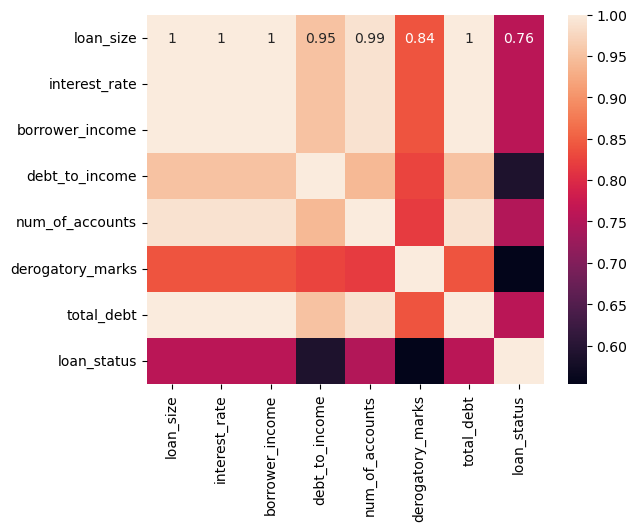

In [6]:
sns.heatmap(corrs, annot=True)
plt.show()

In [7]:
abs(corrs.loan_status).sort_values(ascending=False)

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64

In [8]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [9]:
# Separate the data into labels and features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

In [10]:
# subset
df1 = df.loc[:, features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df1)

# predict/transform
scaled_data = scaler.transform(df1)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [11]:
# Separate the y variable, the labels
y = df.loan_status

# Separate the X variable, the features
X = df_scaled

In [12]:
# Review the y variable Series
df.loan_status.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [13]:
# Review the X variable DataFrame
df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [14]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

---

### Create a Logistic Regression Model with the Original Data
### Step 1: Fit a logistic regression model by using the training data (X_train and y_train)### Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model
### Step 3: Evaluate the model’s performance by doing the following

In [15]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# Fit the model using training data
# Make a prediction using the testing data
# Generate a confusion matrix for the model
# Print the classification report for the model


In [16]:
# Function for Classification
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: {train_cf}
    AUC: {train_auc}
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: {test_cf}
    AUC: {test_auc}
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: [[55958   319]
 [   37  1838]]
    AUC: 0.9943631063015679
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.98      0.91      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.95     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: [[18669    90]
 [   14   611]]
    AUC: 0.996492776800469
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384

    


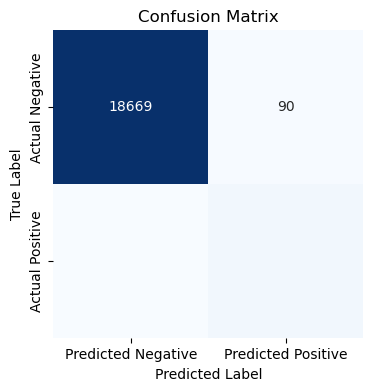

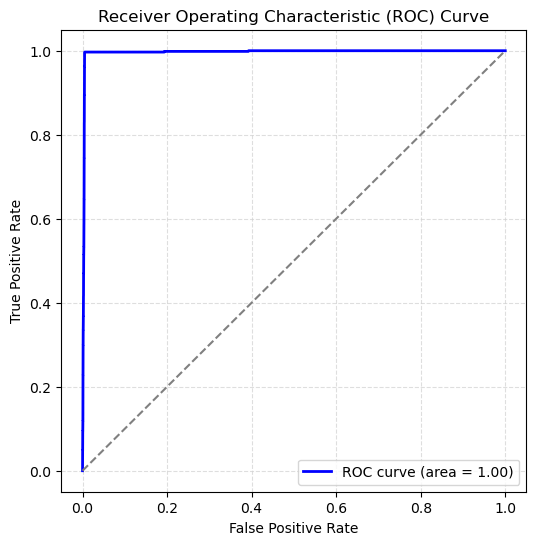

In [17]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: [[56224    53]
 [  102  1773]]
    AUC: 0.9998578886578886
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.97      0.95      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.98      0.97      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: [[18683    76]
 [  123   502]]
    AUC: 0.9366155552001707
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     18759
           1       0.87      0.80      0.83       625

    accuracy                           0.99     19384
   macro avg       0.93      0.90      0.91     19384
weighted avg       0.99      0.99      0.99     19384

    


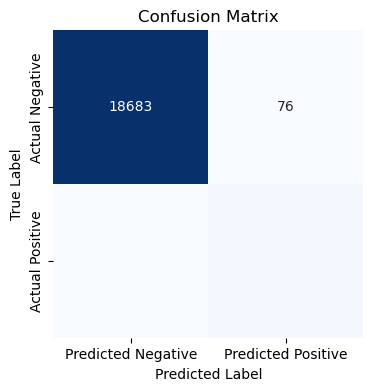

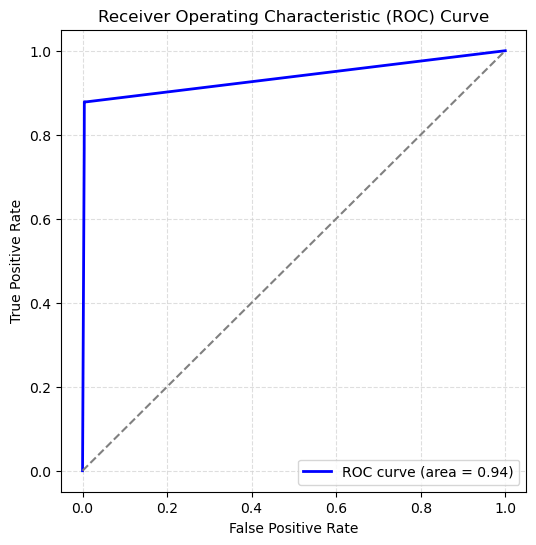

In [18]:
# Decision Tree 
dt = DecisionTreeClassifier(random_state=42)
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: [[56148   129]
 [   27  1848]]
    AUC: 0.9998233452387298
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.93      0.99      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: [[18681    78]
 [   79   546]]
    AUC: 0.9958888640119409
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.87      0.87       625

    accuracy                           0.99     19384
   macro avg       0.94      0.93      0.94     19384
weighted avg       0.99      0.99      0.99     19384

    


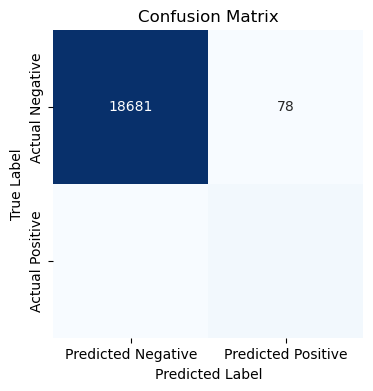

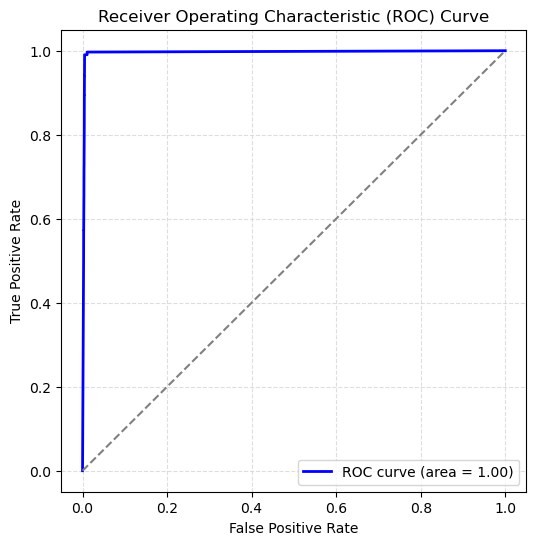

In [19]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: [[55949   328]
 [   12  1863]]
    AUC: 0.9957468142698911
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: [[18669    90]
 [    3   622]]
    AUC: 0.9953770670078362
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


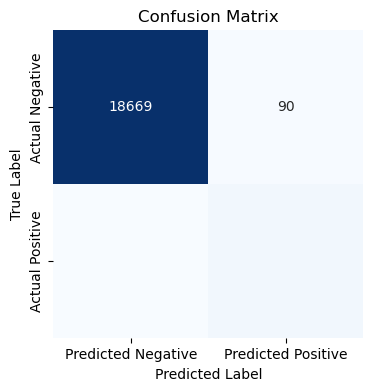

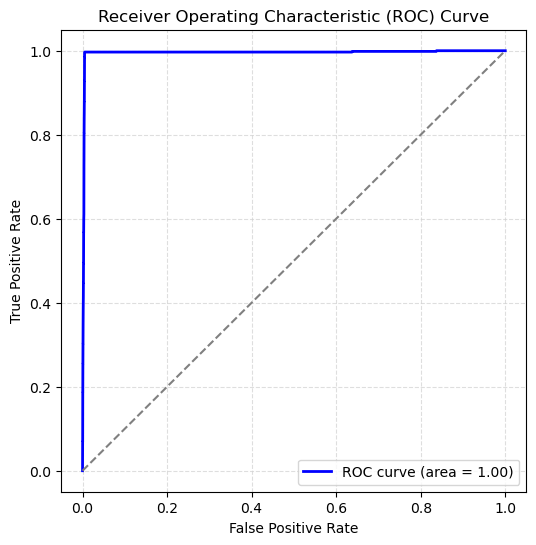

In [23]:
# SVC
svc = SVC(probability=True)
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: [[55951   326]
 [   15  1860]]
    AUC: 0.9971154776077854
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: [[18669    90]
 [    5   620]]
    AUC: 0.9960200010661548
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


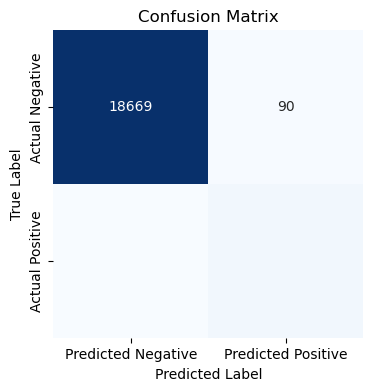

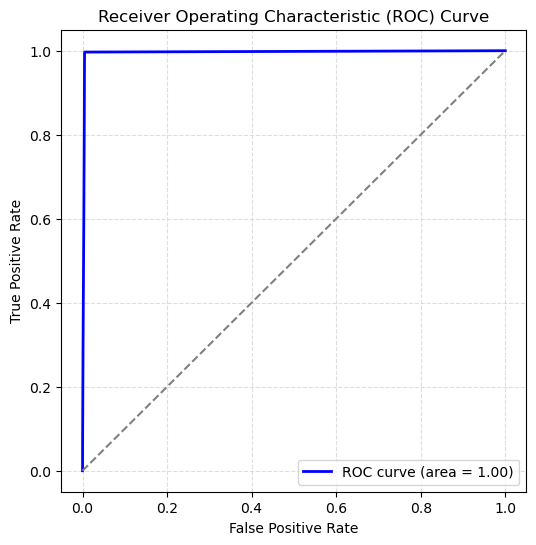

In [21]:
# K Neighbor
knn = KNeighborsClassifier(n_neighbors=15)
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: [[56224    53]
 [  102  1773]]
    AUC: 0.9998578886578886
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.97      0.95      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.98      0.97      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    
TEST METRICS
    Confusion Matrix: [[18681    78]
 [  110   515]]
    AUC: 0.961435769497308
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     18759
           1       0.87      0.82      0.85       625

    accuracy                           0.99     19384
   macro avg       0.93      0.91      0.92     19384
weighted avg       0.99      0.99      0.99     19384

    


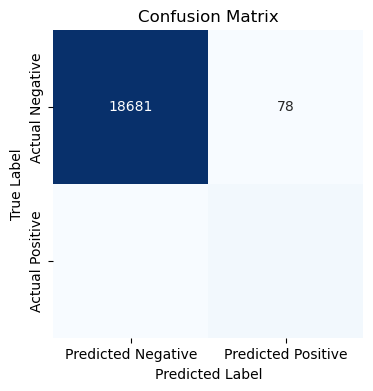

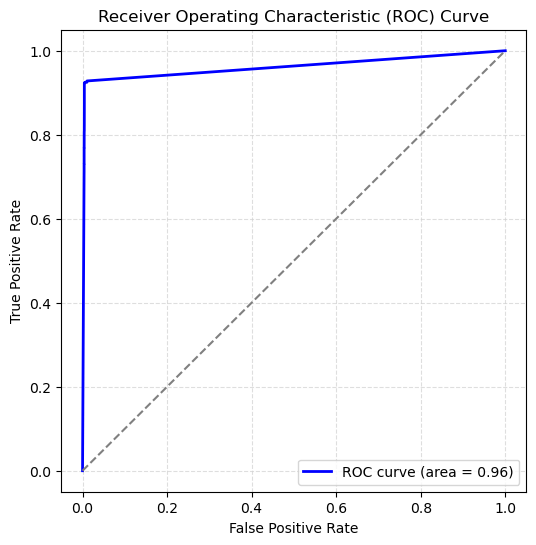

In [24]:
# Extra Trees
et = ExtraTreesClassifier(random_state=42)
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: [[55954   323]
 [   15  1860]]
    AUC: 0.9970676854369163
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: [[18669    90]
 [    5   620]]
    AUC: 0.9964305986459833
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

    


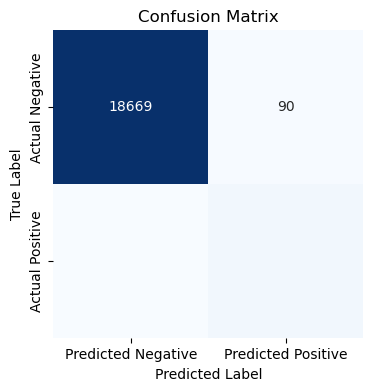

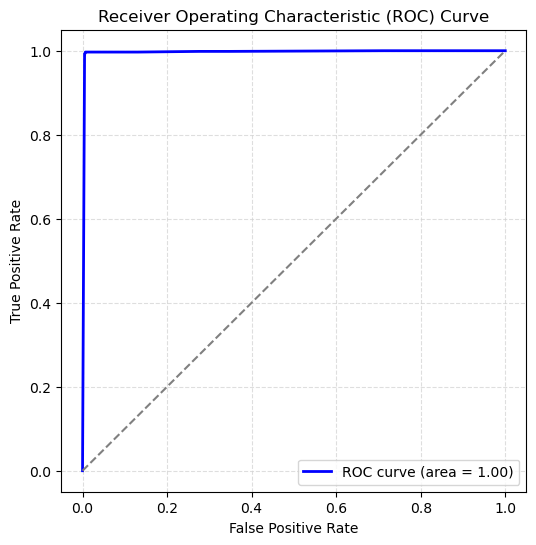

In [25]:
# ADA Boost
ada = AdaBoostClassifier(random_state=42)
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: [[55965   312]
 [   10  1865]]
    AUC: 0.9983701855701855
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.86      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    
TEST METRICS
    Confusion Matrix: [[18668    91]
 [    6   619]]
    AUC: 0.9952849938696093
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      1.00     19384

    


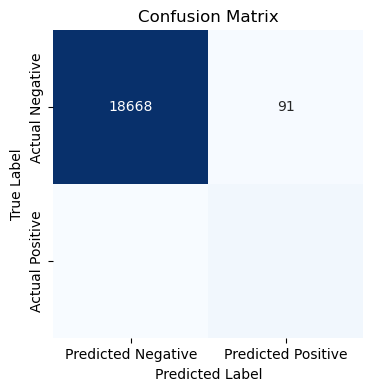

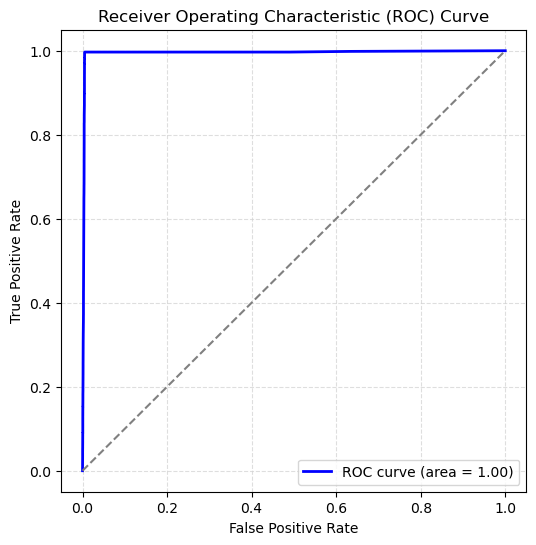

In [26]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
doClassification(gb, X_train, X_test, y_train, y_test)

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** When initally looking at the data and the value counts, it was obvious that there was imbalance since there were 75036 heathly loans, and 2500 high-risk loans. The Logistic Regression model shows that it has great predictive performance. The precision, recall, F1-score, AUC and Confusion Matrix also backed up this finding. 

---